In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [2]:
df=pd.read_csv('/content/Cleaned_LoanData.csv')
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_C,Channel_R,Channel_T,DelinquencyCategory_0,DelinquencyCategory_1,DelinquencyCategory_2,RepaymentCategory_0,RepaymentCategory_1,RepaymentCategory_2,DelinquencyFlag
0,584,1999-04-01,0.0,2029-03-01,0,1,71,21,116000,71,...,0,0,1,0,0,1,1,0,0,0
1,584,1999-05-01,0.0,2029-04-01,0,1,79,28,96000,79,...,0,1,0,0,1,0,1,0,0,1
2,584,1999-05-01,0.0,2029-04-01,0,1,66,18,101000,66,...,0,1,0,0,0,1,0,1,0,0
3,584,1999-03-01,0.0,2029-02-01,0,1,65,25,66000,65,...,0,1,0,0,0,1,0,1,1,0
4,584,1999-03-01,0.0,2029-02-01,0,1,80,38,234000,80,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290257,800,1999-03-01,0.0,2029-02-01,0,1,60,32,90000,60,...,0,1,0,0,0,1,0,0,1,0
290258,800,2002-10-01,0.0,2029-04-01,0,1,73,0,240000,73,...,1,0,0,0,0,1,0,1,0,0
290259,800,2003-04-01,0.0,2029-04-01,0,1,73,31,87000,73,...,0,1,0,0,0,1,0,1,0,0
290260,800,1999-04-01,0.0,2029-03-01,0,1,80,54,88000,80,...,0,1,0,0,0,1,0,1,0,0


In [3]:
# Drop leaky features
leaky_features = ['EverDelinquent', 'DelinquencyCategory_1', 'DelinquencyCategory_0', 'MonthsDelinquent']
df.drop(columns=leaky_features, inplace=True)

In [4]:
# Drop rows with missing target
df = df.dropna(subset=['DelinquencyFlag'])

In [5]:
# Define target and features
X = df.drop('DelinquencyFlag', axis=1)
y = df['DelinquencyFlag']

In [6]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
# Predict on test set
y_pred = lda.predict(X_test)

In [13]:
# Check Train and Test Accuracy
train_accuracy = lda.score(X_train, y_train)
test_accuracy = lda.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9415
Test Accuracy: 0.9410


In [10]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9410
Error Rate: 0.0590
Precision: 0.9998
Recall: 0.7013
F1-score: 0.8244

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     46585
           1       1.00      0.70      0.82     11468

    accuracy                           0.94     58053
   macro avg       0.97      0.85      0.89     58053
weighted avg       0.94      0.94      0.94     58053


Confusion Matrix:
 [[46583     2]
 [ 3425  8043]]


In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate Accuracy across folds
cv_accuracy = cross_val_score(lda, X, y, cv=cv, scoring='accuracy')
cv_f1 = cross_val_score(lda, X, y, cv=cv, scoring='f1')

print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation F1-score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

Cross-Validation Accuracy: 0.9414 ± 0.0007
Cross-Validation F1-score: 0.8258 ± 0.0023


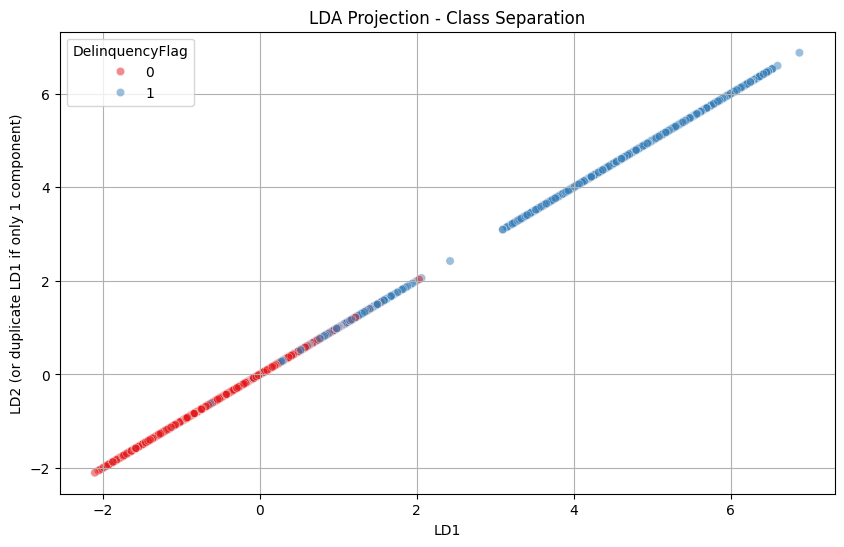

In [12]:
# Reduce to 2D using LDA
X_lda = lda.transform(X)

# Plot the first two LDA components
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,0], hue=y, palette='Set1', alpha=0.5)
plt.title("LDA Projection - Class Separation")
plt.xlabel("LD1")
plt.ylabel("LD2 (or duplicate LD1 if only 1 component)")
plt.legend(title='DelinquencyFlag')
plt.grid(True)
plt.show()